In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
sns.set(font_scale=1.2)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset

In [2]:
df = pd.read_csv(r'part6\Historical Weather Data 2010-2021_preprocessed_1.csv')
df.head()

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,weatherDesc,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,1,1,2010,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,5,4,4,4,9.8,45,6.77,7.66,1707.0,1,1,1,0,0,0
2,2010-01-03,3,1,2010,24,27,21,24,61,50,78,63,4,8,6,6,1017,1014,1015,1015,0.0,0.0,0.0,0.0,4,4,4,4,9.8,41,6.76,7.44,1707.0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,52,46,5,7,6,6,1016,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,43,7.10,7.43,1708.0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,54,45,6,2,4,4,1013,1010,1012,1011,0.0,0.0,0.0,0.0,5,5,5,5,9.8,44,6.53,8.05,1709.0,0,0,0,0,0,0


In [3]:
# columns name 
print(list(df.columns))

['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   observation                               4227 non-null   object 
 1   date                                      4227 non-null   int64  
 2   month                                     4227 non-null   int64  
 3   year                                      4227 non-null   int64  
 4   tempC_7to8                                4227 non-null   int64  
 5   tempC_1to2                                4227 non-null   int64  
 6   tempC_6to7                                4227 non-null   int64  
 7   tempC_avg(0C)                             4227 non-null   int64  
 8   Relative humidity_7to8                    4227 non-null   int64  
 9   Relative humidity_1to2                    4227 non-null   int64  
 10  Relative humidity_6to7              

# Feature Selection

### Filter features by variance

In [5]:
for val in range(len(df.iloc[:, :-6].var())):
    if (df.iloc[:, :-6].var()[val] < 1):
        print(val, df.iloc[:, :-6].var().keys()[val], df.iloc[:, :-6].var()[val])
#         print(df.iloc[:, :-6].var().keys()[val], end=', ')

19 precipMM_7to8 0.08410490512896031
20 precipMM_1to2 0.11755641594146687
21 precipMM_6to7 0.619745075126642
22 precipMM_avg(mm) 0.14154237379454246
23 weatherDesc_7to8 0.7532171823551971
29 soil_pH 0.06578349177548583
30 water_pH 0.2503095181954714


### Observation:

- precipMM_7to8, precipMM_1to2, precipMM_6to7, precipMM_avg(mm), weatherDesc_7to8, soil_pH, water_pH show's less than 1 variance, So we can eliminate its. 

In [6]:
df_without_less_variance = df.drop(columns = ['precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 
                                              'weatherDesc_7to8', 'soil_pH', 'water_pH'])
df_without_less_variance.shape

(4227, 32)

### Filter features by correlation

### Pairwise correlation

In [7]:
# sns.pairplot(df.iloc[:, :-6])

### Pairwise correlation in temp

,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Label (Disease Yes/No)
tempC_7to8,1.000000,0.794591,0.609636,0.891016,-0.071696
tempC_1to2,0.794591,1.000000,0.684452,0.930440,-0.393744
tempC_6to7,0.609636,0.684452,1.000000,0.849070,-0.012142
tempC_avg(0C),0.891016,0.930440,0.849070,1.000000,-0.188397
Label (Disease Yes/No),-0.071696,-0.393744,-0.012142,-0.188397,1.000000


Pearson correlation between tempC_7to8 & Label (Disease Yes/No) is : -7.17 %
Pearson correlation between tempC_1to2 & Label (Disease Yes/No) is : -39.37 %
Pearson correlation between tempC_6to7 & Label (Disease Yes/No) is : -1.21 %
Pearson correlation between tempC_avg(0C) & Label (Disease Yes/No) is : -18.84 %


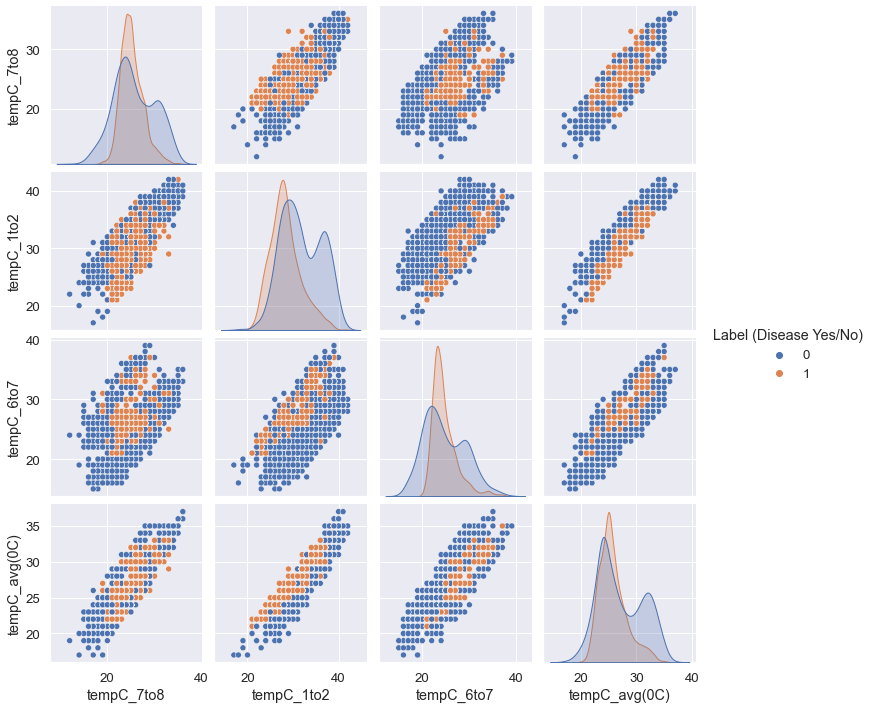

In [8]:
from scipy.stats import pearsonr

df_temp = df[['tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Label (Disease Yes/No)']]
display(df_temp.corr())
sns.pairplot(df_temp, hue = 'Label (Disease Yes/No)')

for col in df_temp.columns[:-1]:
    print(f"Pearson correlation between {col} & Label (Disease Yes/No) is : \
{round(pearsonr(df_temp[col], df_temp['Label (Disease Yes/No)'])[0]*100,2)} %")
    

### Observation:

- The all temp columns are highly correlated with each other ( > 50%)
- The correlation between tempC_1to2 & Label (Disease Yes/No) is -39.37% (-ve correlation)
- The correlation between tempC_avg(0C) & Label (Disease Yes/No) is -18.84% (-ve correlation)
- So, we can keep tempC_1to2 or tempC_avg(0C)

In [9]:
def get_Pairwise_Correlation(cols, hue_col):
    df_temp = df[cols]
    display(df_temp.corr())
    sns.pairplot(df_temp, hue = hue_col)
        
    for col in df_temp.columns[:-1]:
        print(f"Pearson correlation between {col} & {hue_col} is : {round(pearsonr(df_temp[col], df_temp[hue_col])[0]*100,2)}%")


### Pairwise correlation in humidity

,Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),Label (Disease Yes/No)
Relative humidity_7to8,1.000000,0.947885,0.921824,0.974510,0.698479
Relative humidity_1to2,0.947885,1.000000,0.952480,0.986800,0.707830
Relative humidity_6to7,0.921824,0.952480,1.000000,0.978579,0.695503
Relative humidity_avg(%),0.974510,0.986800,0.978579,1.000000,0.714930
Label (Disease Yes/No),0.698479,0.707830,0.695503,0.714930,1.000000


Pearson correlation between Relative humidity_7to8 & Label (Disease Yes/No) is : 69.85%
Pearson correlation between Relative humidity_1to2 & Label (Disease Yes/No) is : 70.78%
Pearson correlation between Relative humidity_6to7 & Label (Disease Yes/No) is : 69.55%
Pearson correlation between Relative humidity_avg(%) & Label (Disease Yes/No) is : 71.49%


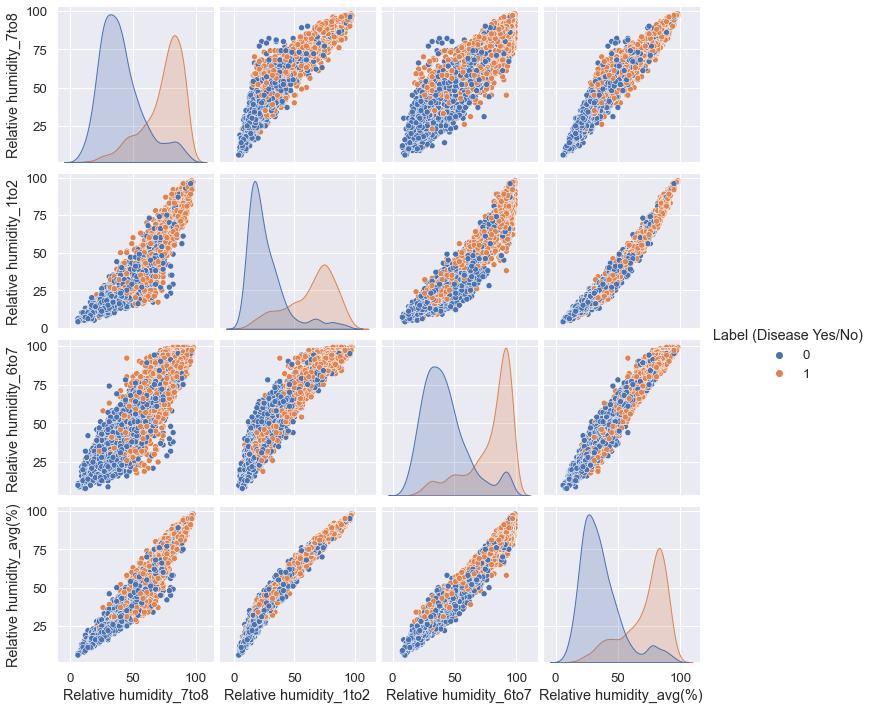

In [10]:
cols = ['Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The all humidity columns are highly correlated with each other ( > 50%)
- The correlation between Relative humidity_avg(%) & Label (Disease Yes/No) is 71.49% (+ve correlation)
- So, we can keep Relative humidity_avg(%)

### Pairwise correlation in windspeed

,windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),Label (Disease Yes/No)
windspeedKmph_7to8,1.000000,0.839478,0.740329,0.913386,0.327046
windspeedKmph_1to2,0.839478,1.000000,0.844685,0.961066,0.332969
windspeedKmph_6to7,0.740329,0.844685,1.000000,0.923829,0.286785
windspeedKmph_avg(Km/h),0.913386,0.961066,0.923829,1.000000,0.337844
Label (Disease Yes/No),0.327046,0.332969,0.286785,0.337844,1.000000


Pearson correlation between windspeedKmph_7to8 & Label (Disease Yes/No) is : 32.7%
Pearson correlation between windspeedKmph_1to2 & Label (Disease Yes/No) is : 33.3%
Pearson correlation between windspeedKmph_6to7 & Label (Disease Yes/No) is : 28.68%
Pearson correlation between windspeedKmph_avg(Km/h) & Label (Disease Yes/No) is : 33.78%


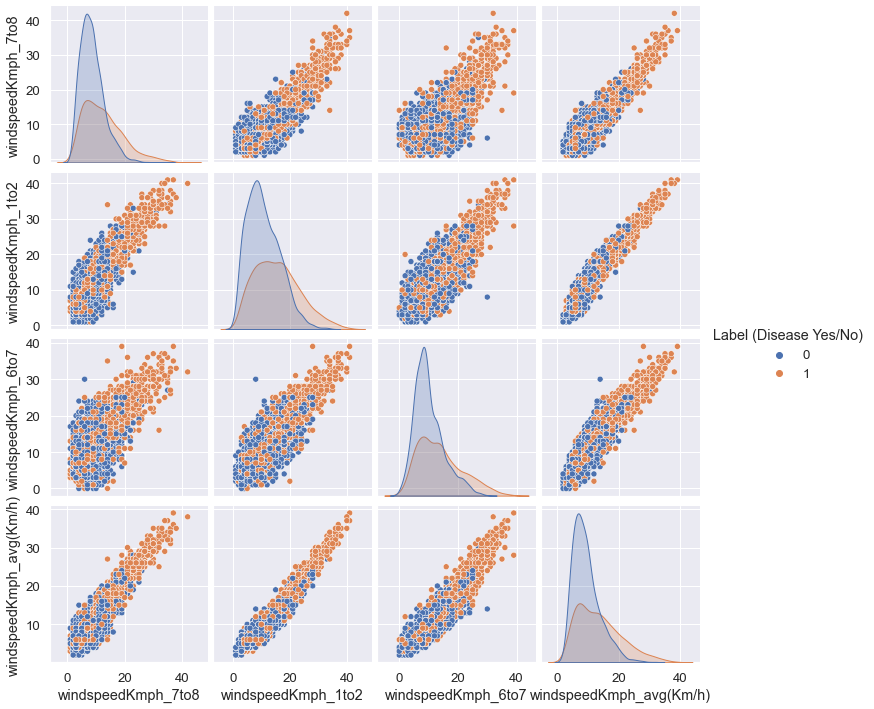

In [11]:
cols = ['windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The all windspeed columns are highly correlated with each other ( > 50%)
- The correlation between windspeedKmph_avg(Km/h) & Label (Disease Yes/No) is 33.78% (+ve correlation)
- So, we can keep windspeedKmph_avg(Km/h)

### Pairwise correlation in pressure

,pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,Label (Disease Yes/No)
pressureMB_7to8,1.000000,0.968658,0.963754,0.987808,-0.595491
pressureMB_1to2,0.968658,1.000000,0.958491,0.985832,-0.544604
pressureMB_6to7,0.963754,0.958491,1.000000,0.982979,-0.534666
pressureMB_avg,0.987808,0.985832,0.982979,1.000000,-0.562562
Label (Disease Yes/No),-0.595491,-0.544604,-0.534666,-0.562562,1.000000


Pearson correlation between pressureMB_7to8 & Label (Disease Yes/No) is : -59.55%
Pearson correlation between pressureMB_1to2 & Label (Disease Yes/No) is : -54.46%
Pearson correlation between pressureMB_6to7 & Label (Disease Yes/No) is : -53.47%
Pearson correlation between pressureMB_avg & Label (Disease Yes/No) is : -56.26%


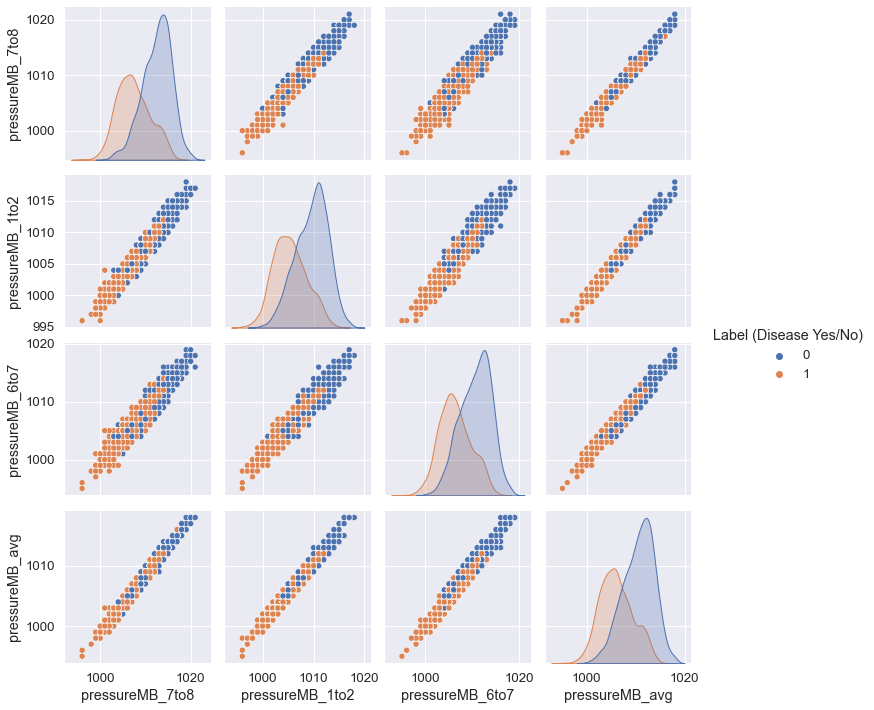

In [12]:
cols = ['pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The all windspeed columns are highly correlated with each other ( > 50%)
- The correlation between pressureMB_7to8 & Label (Disease Yes/No) is -59.55% (-ve correlation)
- The correlation between pressureMB_avg & Label (Disease Yes/No) is -56.26% (-ve correlation)
- So, we can keep pressureMB_7to8 & pressureMB_avg

### Pairwise correlation in precip

,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),Label (Disease Yes/No)
precipMM_7to8,1.000000,0.353533,0.233664,0.527324,0.158429
precipMM_1to2,0.353533,1.000000,0.510297,0.750550,0.379157
precipMM_6to7,0.233664,0.510297,1.000000,0.912554,0.269750
precipMM_avg(mm),0.527324,0.750550,0.912554,1.000000,0.344038
Label (Disease Yes/No),0.158429,0.379157,0.269750,0.344038,1.000000


Pearson correlation between precipMM_7to8 & Label (Disease Yes/No) is : 15.84%
Pearson correlation between precipMM_1to2 & Label (Disease Yes/No) is : 37.92%
Pearson correlation between precipMM_6to7 & Label (Disease Yes/No) is : 26.97%
Pearson correlation between precipMM_avg(mm) & Label (Disease Yes/No) is : 34.4%


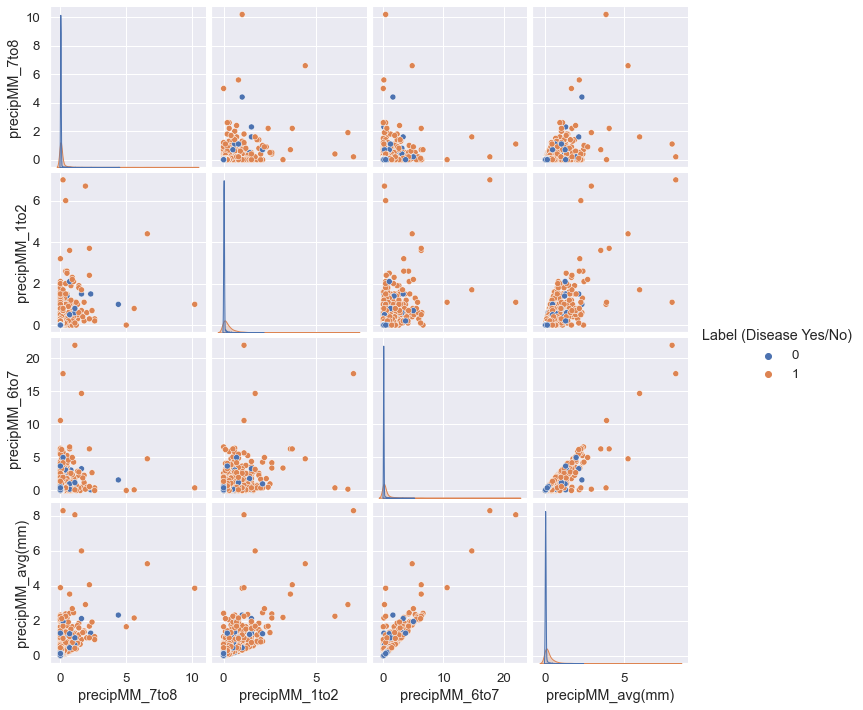

In [13]:
cols = ['precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The all precip columns are correlated with each other
- The correlation between precipMM_1to2 & Label (Disease Yes/No) is 37.92% (+ve correlation)
- The correlation between precipMM_avg(mm) & Label (Disease Yes/No) is 34.4% (+ve correlation)
- So, we can keep precipMM_1to2 & precipMM_avg(mm)

### Pairwise correlation in weather

,weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,weatherDesc,Label (Disease Yes/No)
weatherDesc_7to8,1.000000,0.706125,0.684671,0.734098,-0.605411
weatherDesc_1to2,0.706125,1.000000,0.763651,0.919745,-0.726626
weatherDesc_6to7,0.684671,0.763651,1.000000,0.875130,-0.701374
weatherDesc,0.734098,0.919745,0.875130,1.000000,-0.760430
Label (Disease Yes/No),-0.605411,-0.726626,-0.701374,-0.760430,1.000000


Pearson correlation between weatherDesc_7to8 & Label (Disease Yes/No) is : -60.54%
Pearson correlation between weatherDesc_1to2 & Label (Disease Yes/No) is : -72.66%
Pearson correlation between weatherDesc_6to7 & Label (Disease Yes/No) is : -70.14%
Pearson correlation between weatherDesc & Label (Disease Yes/No) is : -76.04%


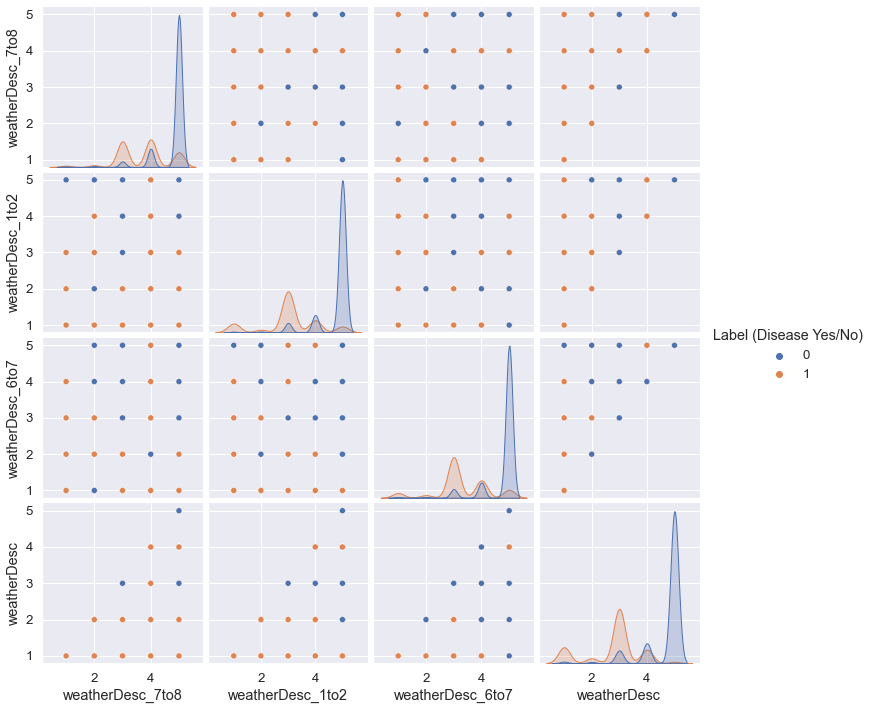

In [14]:
cols = ['weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The all weather columns are highly correlated with each other ( > 50%)
- The correlation between weatherDesc & Label (Disease Yes/No) is -76.04% (-ve correlation)
- So, we can keep weatherDesc

### Pairwise correlation with other

,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No)
Sunshine Hours,1.000000,-0.769105,0.047175,0.053492,0.010106,-0.662051
%_soil_moisure,-0.769105,1.000000,-0.073358,-0.035720,0.001171,0.606175
soil_pH,0.047175,-0.073358,1.000000,-0.013978,-0.033262,-0.032147
water_pH,0.053492,-0.035720,-0.013978,1.000000,0.003156,-0.041087
water_TDS_mgpl,0.010106,0.001171,-0.033262,0.003156,1.000000,-0.006777
Label (Disease Yes/No),-0.662051,0.606175,-0.032147,-0.041087,-0.006777,1.000000


Pearson correlation between Sunshine Hours & Label (Disease Yes/No) is : -66.21%
Pearson correlation between %_soil_moisure & Label (Disease Yes/No) is : 60.62%
Pearson correlation between soil_pH & Label (Disease Yes/No) is : -3.21%
Pearson correlation between water_pH & Label (Disease Yes/No) is : -4.11%
Pearson correlation between water_TDS_mgpl & Label (Disease Yes/No) is : -0.68%


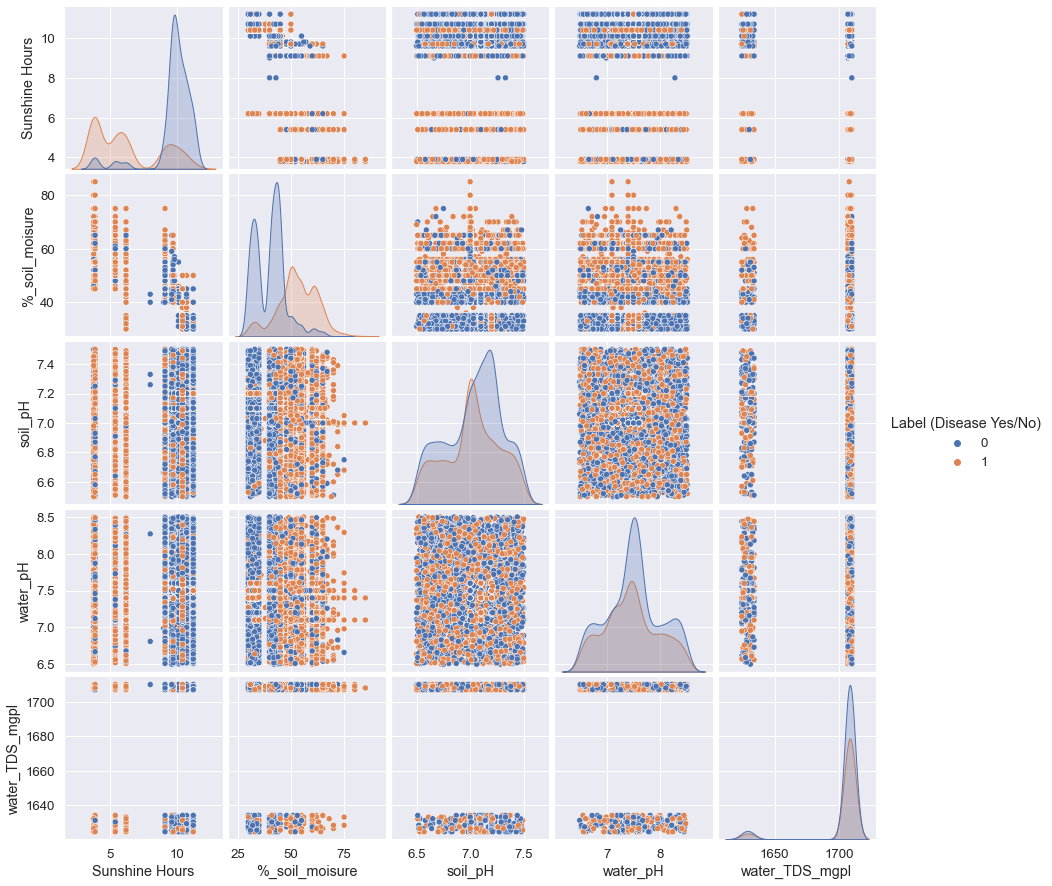

In [15]:
cols = ['Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The Sunshine Hours & %_soil_moisure shows the high correlation with Label (Disease Yes/No), -66.21% (-ve correlation) & 60.62% (+ve correlation) respectively
- The other show the correlation but very less
- So, we can keep Sunshine Hours & %_soil_moisure shows

### Pairwise correlation with dates

,date,month,year,Label (Disease Yes/No)
date,1.000000,0.009698,-0.001954,-0.000855
month,0.009698,1.000000,-0.017837,0.256182
year,-0.001954,-0.017837,1.000000,0.009722
Label (Disease Yes/No),-0.000855,0.256182,0.009722,1.000000


Pearson correlation between date & Label (Disease Yes/No) is : -0.09%
Pearson correlation between month & Label (Disease Yes/No) is : 25.62%
Pearson correlation between year & Label (Disease Yes/No) is : 0.97%


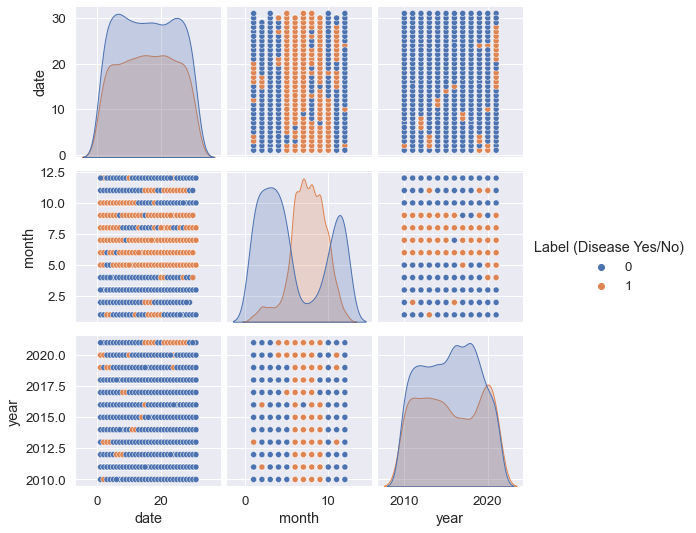

In [16]:
cols = ['date', 'month', 'year', 'Label (Disease Yes/No)']
hue_col = cols[-1]
get_Pairwise_Correlation(cols, hue_col)

### Observation:

- The month shows the correlation but < 50%
- So, we can think to keep it or not

In [17]:
df_with_correlation = df[['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
                          'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 
                          'Label (Disease Yes/No)']]
df_with_correlation.shape

(4227, 9)

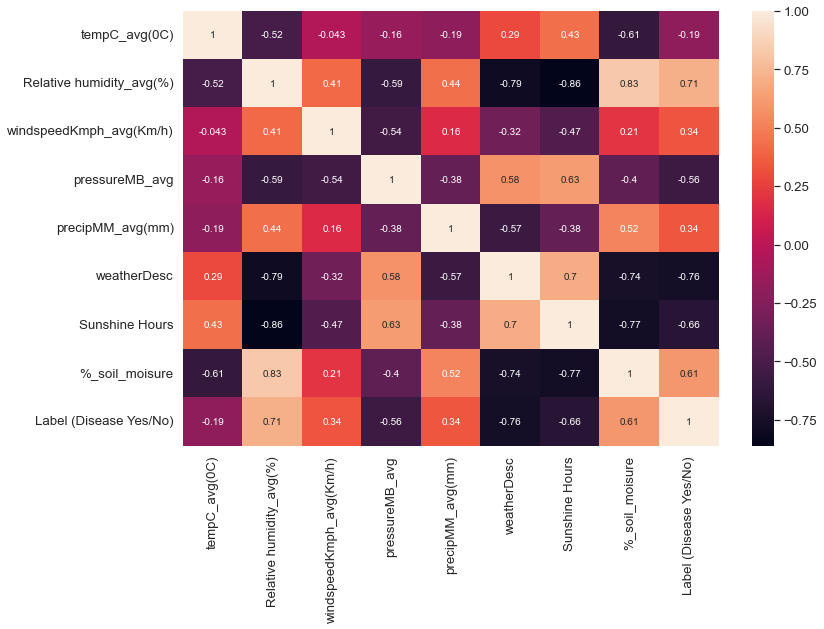

In [18]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_with_correlation.corr(), ax=ax, annot=True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle

In [26]:
X, Y = df_with_correlation.iloc[:,:-1], df_with_correlation.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [27]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  

lr_Classifier= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3757, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  
lr_Classifier.fit(X_train, y_train)  

LogisticRegression(max_iter=1000, random_state=3757)

In [28]:
y_pred = lr_Classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

Accuracy_score: 89.52 %
Loss: 10.48 %
Cohen_kappa_score: 78.27 %
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       742
           1       0.89      0.85      0.87       527

    accuracy                           0.90      1269
   macro avg       0.89      0.89      0.89      1269
weighted avg       0.90      0.90      0.89      1269

confusion_matrix:
 [[688  54]
 [ 79 448]]


<AxesSubplot:>

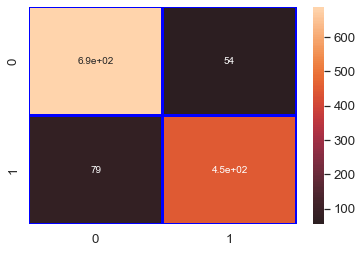

In [32]:

print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(6,4) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
                 linewidths = 2,
                linecolor = "blue",
                center=0)

In [36]:
# save the model to disk
filename = 'lr_Classifier.pkl'
pickle.dump(lr_Classifier, open(filename, 'wb'))

In [37]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  

knn_Classifier= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')  
knn_Classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_jobs=-1)

In [38]:
y_pred = knn_Classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

Accuracy_score: 88.26 %
Loss: 11.74 %
Cohen_kappa_score: 75.47 %
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       742
           1       0.90      0.81      0.85       527

    accuracy                           0.88      1269
   macro avg       0.89      0.87      0.88      1269
weighted avg       0.88      0.88      0.88      1269

confusion_matrix:
 [[694  48]
 [101 426]]


<AxesSubplot:>

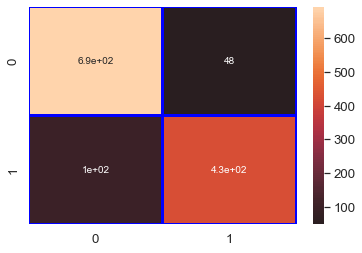

In [40]:

print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(6,4) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
                 linewidths = 2,
                linecolor = "blue",
                center=0)

In [41]:
# save the model to disk
filename = 'knn_Classifier_hc.pkl'
pickle.dump(knn_Classifier, open(filename, 'wb'))

In [42]:
from sklearn.naive_bayes import GaussianNB

nb_Classifier = GaussianNB(priors=None, var_smoothing=1e-09)

nb_Classifier.fit(X_train, y_train)  

GaussianNB()

In [43]:
y_pred = nb_Classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

Accuracy_score: 86.84 %
Loss: 13.16 %
Cohen_kappa_score: 72.36 %
Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       742
           1       0.89      0.77      0.83       527

    accuracy                           0.87      1269
   macro avg       0.87      0.85      0.86      1269
weighted avg       0.87      0.87      0.87      1269

confusion_matrix:
 [[694  48]
 [119 408]]


<AxesSubplot:>

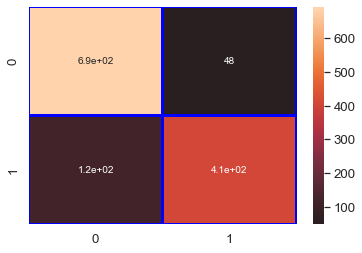

In [44]:
print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(6,4) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
                 linewidths = 2,
                linecolor = "blue",
                center=0)

In [45]:
# save the model to disk
filename = 'nb_Classifier_hc.pkl'
pickle.dump(nb_Classifier, open(filename, 'wb'))

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_Classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=3757, splitter='best')

dt_Classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=3757)

In [48]:
y_pred = dt_Classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

Accuracy_score: 93.46 %
Loss: 6.54 %
Cohen_kappa_score: 86.43 %
Classification_report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       742
           1       0.94      0.90      0.92       527

    accuracy                           0.93      1269
   macro avg       0.94      0.93      0.93      1269
weighted avg       0.93      0.93      0.93      1269

confusion_matrix:
 [[714  28]
 [ 55 472]]


<AxesSubplot:>

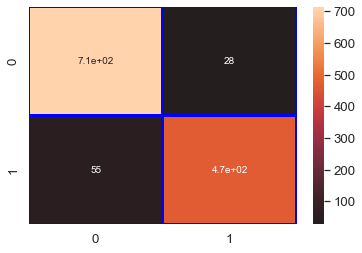

In [49]:
print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(6,4) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
                 linewidths = 2,
                linecolor = "blue",
                center=0)

In [51]:
# save the model to disk
filename = 'dt_Classifier_hc.pkl'
pickle.dump(dt_Classifier, open(filename, 'wb'))

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_Classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3757, verbose=0,
                       warm_start=False)

rf_Classifier.fit(X_train, y_train)  

RandomForestClassifier(n_jobs=-1, random_state=3757)

In [53]:
y_pred = rf_Classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

Accuracy_score: 96.53 %
Loss: 3.47 %
Cohen_kappa_score: 92.88 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       742
           1       0.95      0.97      0.96       527

    accuracy                           0.97      1269
   macro avg       0.96      0.97      0.96      1269
weighted avg       0.97      0.97      0.97      1269

confusion_matrix:
 [[714  28]
 [ 16 511]]


<AxesSubplot:>

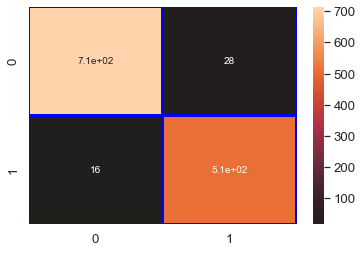

In [54]:
print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(6,4) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
                 linewidths = 2,
                linecolor = "blue",
                center=0)

In [55]:
# save the model to disk
filename = 'rf_Classifier_hc.pkl'
pickle.dump(rf_Classifier, open(filename, 'wb'))